In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.columns=["spam","sms"]
data

,spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data['spam'] = np.where(data['spam'] == 'ham',0,1)
data

,spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
data.head()

,spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.tail()

,spam,sms
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [9]:
data.value_counts(["spam"])

spam
0       4825
1        747
dtype: int64

In [10]:
data['sms'].duplicated().sum()

403

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(5169, 2)

In [13]:
data.reset_index(inplace=True)

In [14]:
data.drop("index",axis=1,inplace=True)

In [15]:
data.isna().sum()

spam    0
sms     0
dtype: int64

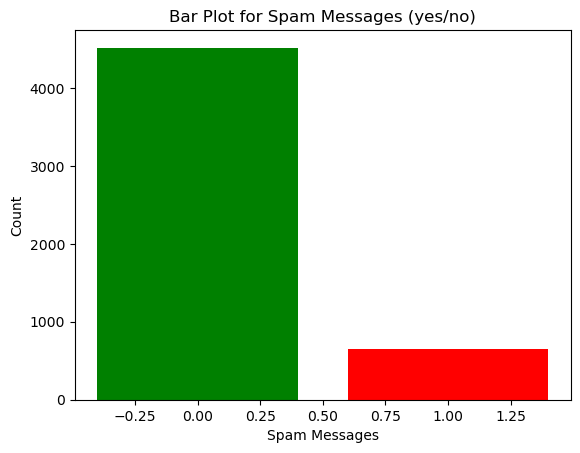

In [16]:
import matplotlib.pyplot as plt

spam_counts = data['spam'].value_counts()

# Create a bar plot
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Spam Messages')
plt.ylabel('Count')
plt.title('Bar Plot for Spam Messages (yes/no)')
plt.show()

In [17]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
corpus=[]

for i in range(data.shape[0]):
    features=re.sub('[^a-zA-Z]',' ',data['sms'][i])
    features=features.lower()
    corpus.append(features)

In [19]:
data['features']=corpus
data.head()

,spam,sms,features
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...


In [20]:
x=data['features']
y=data['spam']

In [21]:
cvector=CountVectorizer()
cvdf=cvector.fit_transform(x)

In [22]:
cvdf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(cvdf,y)

In [24]:
y_sm.value_counts()

0    4516
1    4516
Name: spam, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

In [26]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9618151632540122

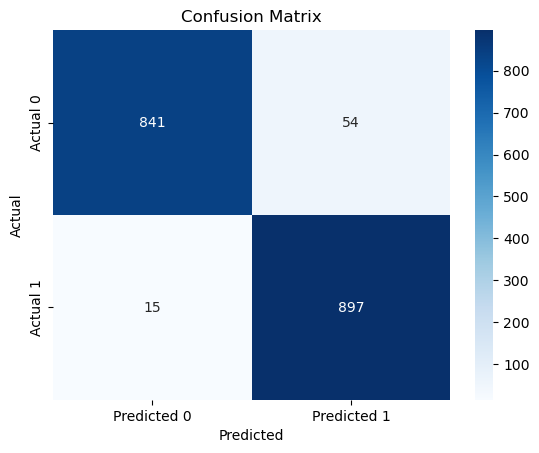

In [27]:
import seaborn as sns

# Calculate confusion matrix
mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap using seaborn
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       895
           1       0.94      0.98      0.96       912

    accuracy                           0.96      1807
   macro avg       0.96      0.96      0.96      1807
weighted avg       0.96      0.96      0.96      1807



In [29]:
import gradio as gr

def sms_spam_classification(input_text):
    yp = svm.predict(cvector.transform([input_text]))
    return "Spam" if yp[0] == 1 else "Not Spam"

# Create Gradio interface
app = gr.Interface(fn=sms_spam_classification, inputs=gr.Textbox(type="text", label="SMS"), outputs=gr.Textbox(), description="SMS Spam Classification Model")
app.launch(share=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
